<a href="https://colab.research.google.com/github/KunjanMalik/Data-mining-Assignmet-1/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I have choosen the data set from Kaggle https://www.kaggle.com/jessemostipak/hotel-booking-demand to implement for this assignment. This dataset have hotel booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces. I will be performing Data Cleaning, Pre-processing, Visulization and Data Modelling.

In [96]:
#Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from IPython.display import HTML


import numpy as np # linear algebra
import pandas as pd # data processing
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set(style="darkgrid")
from scipy.stats import norm
from scipy import stats
import pylab 
import plotly.express as px
import seaborn as sns  # for nice graphics
import missingno as msno


mouted the dataset over my drive

In [97]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [98]:
!ls "/content/gdrive/MyDrive/data.csv"

/content/gdrive/MyDrive/data.csv


Stored the dataset into data variable

In [99]:
data = pd.read_csv('/content/gdrive/MyDrive/hotel_bookings.csv')

In [100]:
data #showing all data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [101]:
print(data.info()) #data information like numbers of features and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [102]:
print(data.isnull().sum()) #features having the null value

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [103]:
print(data.isnull().mean())

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [104]:
data["company"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

In [105]:
data["company"].isnull() 

0         True
1         True
2         True
3         True
4         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Name: company, Length: 119390, dtype: bool

In [106]:
data['company'][data["company"].isnull()==0]

18        110.0
218       110.0
219       110.0
220       110.0
295       113.0
          ...  
119119    451.0
119122    451.0
119123    451.0
119124     72.0
119248    485.0
Name: company, Length: 6797, dtype: float64

In [107]:
len(set(data['company'][data["company"].isnull()==0]))

352

In [108]:
del data["company"]

I have removed the 'company' feature because it has 94% of null value and it is difficult to predict values from only 6% of data to replace with it, hence this feature become irrelavant.

In [109]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [110]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

'Company' feature deleted

In [111]:
"company" in data.columns

False

Checking the Children Columns

In [112]:
data["children"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [113]:
data["children"].isnull() 

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: children, Length: 119390, dtype: bool

In [114]:
data['children'][data["children"].isnull()== 1]

40600   NaN
40667   NaN
40679   NaN
41160   NaN
Name: children, dtype: float64

Replacing the null value with zero, as children columns has informing the number children appeared in hotel, so null in children column should represent the zero children.

In [115]:
data['children'] = data['children'].fillna(0)

In [116]:
data['children'][data["children"].isnull()== 1]

Series([], Name: children, dtype: float64)

Handling the Agent Column.

In [117]:
data["agent"]

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [118]:
data["agent"].isnull() 

0          True
1          True
2          True
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: agent, Length: 119390, dtype: bool

In [119]:
data['agent'][data["agent"].isnull()== 1]

0        NaN
1        NaN
2        NaN
6        NaN
18       NaN
          ..
119124   NaN
119151   NaN
119166   NaN
119215   NaN
119248   NaN
Name: agent, Length: 16340, dtype: float64

In [120]:
data["agent"]

0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [121]:
data["agent"].isnull() == 0

0         False
1         False
2         False
3          True
4          True
          ...  
119385     True
119386     True
119387     True
119388     True
119389     True
Name: agent, Length: 119390, dtype: bool

In [122]:
data = data[data["agent"].isnull() == 0]

In [123]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.00,0,1,Canceled,2015-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [124]:
print(data.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           154
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

Handling the country column

In [125]:
data["country"]

3         GBR
4         GBR
5         GBR
7         PRT
8         PRT
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 103050, dtype: object

In [126]:
data["country"].isnull() 


3         False
4         False
5         False
7         False
8         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: country, Length: 103050, dtype: bool

In [127]:
data['country'][data["country"].isnull()== 1]

11262     NaN
11263     NaN
11264     NaN
11265     NaN
11266     NaN
         ... 
44903     NaN
44904     NaN
44905     NaN
80830     NaN
101488    NaN
Name: country, Length: 154, dtype: object

In [128]:
data = data[data["country"].isnull() == 0]

All the null values and columns has no information has been handled

In [129]:
print(data.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Feature selection for Visualization and Model

In [130]:
required_features = ["hotel", 
                     "is_canceled", 
                     "arrival_date_year", 
                     "arrival_date_month", 
                     "arrival_date_week_number",
                     "arrival_date_day_of_month", 
                     "stays_in_weekend_nights", 
                     "stays_in_week_nights",
                     "adults",
                     "children" ,
                     "meal", 
                     "country",
                     "previous_cancellations",
                     "previous_bookings_not_canceled",
                     "reserved_room_type",
                     "agent",
                     "days_in_waiting_list",
                     "required_car_parking_spaces",
                     "reservation_status"]

In [131]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06


In [132]:
filtered_data=data[required_features]

In [133]:
filtered_data

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,agent,days_in_waiting_list,required_car_parking_spaces,reservation_status
3,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,BB,GBR,0,0,A,304.0,0,0,Check-Out
4,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,BB,GBR,0,0,A,240.0,0,0,Check-Out
5,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,BB,GBR,0,0,A,240.0,0,0,Check-Out
7,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,FB,PRT,0,0,C,303.0,0,0,Check-Out
8,Resort Hotel,1,2015,July,27,1,0,3,2,0.0,BB,PRT,0,0,A,240.0,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,35,30,2,5,2,0.0,BB,BEL,0,0,A,394.0,0,0,Check-Out
119386,City Hotel,0,2017,August,35,31,2,5,3,0.0,BB,FRA,0,0,E,9.0,0,0,Check-Out
119387,City Hotel,0,2017,August,35,31,2,5,2,0.0,BB,DEU,0,0,D,9.0,0,0,Check-Out
119388,City Hotel,0,2017,August,35,31,2,5,2,0.0,BB,GBR,0,0,A,89.0,0,0,Check-Out


In [134]:
filtered_data.dtypes

hotel                              object
is_canceled                         int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
meal                               object
country                            object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
agent                             float64
days_in_waiting_list                int64
required_car_parking_spaces         int64
reservation_status                 object
dtype: object

Fixing the Datatype of features 

In [135]:
filtered_data['children']=filtered_data['children'].astype(int)

In [136]:
filtered_data['agent']=filtered_data['agent'].astype(int)

In [137]:
#filtered_data['meal']=filtered_data['meal'].astype(str) # after converting to string still storing the feature as object
filtered_data['meal'] = filtered_data['meal'].astype(str) #the max length is set at 80 bytes
filtered_data['hotel']=filtered_data['hotel'].astype(str)
filtered_data['arrival_date_month']=filtered_data['arrival_date_month'].astype(str)
filtered_data['country']=filtered_data['country'].astype(str)
filtered_data['reservation_status']=filtered_data['reservation_status'].astype(str)
filtered_data['reserved_room_type']=filtered_data['reserved_room_type'].astype(str)

In [138]:
filtered_data['is_canceled']=filtered_data['is_canceled']. astype('bool')
filtered_data['previous_bookings_not_canceled']=filtered_data['previous_bookings_not_canceled']. astype('bool')

**Data Visualization**

In [139]:
column_name = "children"
column_sum = filtered_data[column_name].sum()
print(column_sum)

11445


In [140]:
column_name = "required_car_parking_spaces"
column_sum = filtered_data[column_name].sum()
print(column_sum)

5457


In [141]:
column_name = "adults"
column_sum = filtered_data[column_name].sum()
print(column_sum)

195495


['children', 'required_car_parking_spaces', 'adults']


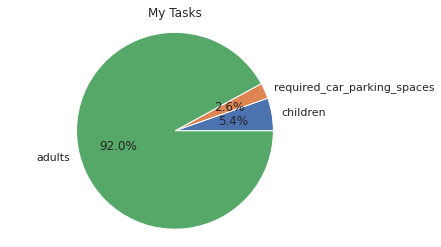

In [142]:
from pandas import DataFrame
import matplotlib.pyplot as plt

Tasks = [11445,5457,195495]
itens = ['children','required_car_parking_spaces','adults']
df = DataFrame(filtered_data,columns=['Tasks'])

labels = list(itens)
print(labels)
plt.pie(Tasks, labels=labels, autopct='%1.1f%%', explode=None)
plt.title('My Tasks')
plt.axis('equal')
plt.show()

Mostly adults are booking hotels, with less percentage of children.Even required parking spaces are also not enough

(array([31713.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 71183.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

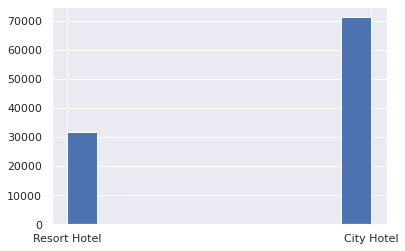

In [143]:
hotel_type = filtered_data['hotel'].to_list()
plt.hist(hotel_type, density=False, bins=10)


Number of Resort hotel is lesser as compared to City hotel

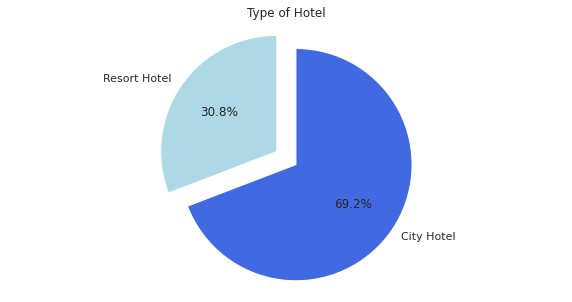

In [144]:
plt.figure(figsize=(10, 5))
labels=['Resort Hotel', 'City Hotel']
plt.pie(filtered_data['hotel'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.1f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Hotel')
plt.axis('equal')
plt.show()

One third of the hotels are resort hotels. City hotels are more than resort hotels. City hotels are in more demand than resort hotels and they are cheaper as well.

In [145]:

print(filtered_data.country)

3         GBR
4         GBR
5         GBR
7         PRT
8         PRT
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 102896, dtype: object


In [146]:
resort_data = filtered_data[filtered_data["hotel"] == "Resort Hotel"]
city_data = filtered_data[filtered_data["hotel"] == "City Hotel"]
#assiging resort and city data seprately.

In [147]:
city_data

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,agent,days_in_waiting_list,required_car_parking_spaces,reservation_status
40060,City Hotel,False,2015,July,27,1,0,2,1,0,HB,PRT,0,False,A,6,0,0,Check-Out
40061,City Hotel,True,2015,July,27,1,0,4,2,0,BB,PRT,0,False,A,9,0,0,Canceled
40062,City Hotel,True,2015,July,27,1,0,4,1,0,BB,PRT,0,False,A,9,0,0,Canceled
40063,City Hotel,True,2015,July,27,1,2,4,2,0,BB,PRT,0,False,A,9,0,0,Canceled
40064,City Hotel,True,2015,July,27,2,0,2,2,0,BB,PRT,0,False,A,9,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,2017,August,35,30,2,5,2,0,BB,BEL,0,False,A,394,0,0,Check-Out
119386,City Hotel,False,2017,August,35,31,2,5,3,0,BB,FRA,0,False,E,9,0,0,Check-Out
119387,City Hotel,False,2017,August,35,31,2,5,2,0,BB,DEU,0,False,D,9,0,0,Check-Out
119388,City Hotel,False,2017,August,35,31,2,5,2,0,BB,GBR,0,False,A,89,0,0,Check-Out


In [148]:
def get_country(filtered_data, n):
    country_data = filtered_data.groupby(['country']).size().reset_index(name='counts')
    country_data = country_data.sort_values('counts')
    return country_data.tail(n)

In [149]:
country_resort = get_country(resort_data, 20)
print(country_resort)
fig1 = px.bar(country_resort, x='country', y='counts',title='From 20 countries guests of the resort hotel are')
fig1.show()

    country  counts
20      CHN     120
41      FIN     131
7       AUT     171
95      ROU     173
96      RUS     176
104     SWE     258
91      POL     280
10      BEL     363
58      ITA     377
18      CHE     389
15      BRA     392
82      NLD     418
115     USA     427
23       CN     685
32      DEU    1100
43      FRA    1446
54      IRL    2035
39      ESP    3664
44      GBR    5699
93      PRT   12285


In [150]:
country_resort = get_country(city_data, 20)
print(country_resort)
fig1 = px.bar(country_resort, x='country', y='counts',title='From 20 countries guests of the city hotel are')
fig1.show()

    country  counts
130     RUS     394
116     NOR     465
123     POL     535
31       CN     554
74      ISR     634
142     SWE     681
28      CHN     829
12      AUT     994
70      IRL    1163
26      CHE    1252
115     NLD    1541
157     USA    1543
23      BRA    1694
14      BEL    1793
75      ITA    3178
46      ESP    4184
53      GBR    5190
39      DEU    5898
50      FRA    8364
125     PRT   25308


In [151]:
filtered_data

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,agent,days_in_waiting_list,required_car_parking_spaces,reservation_status
3,Resort Hotel,False,2015,July,27,1,0,1,1,0,BB,GBR,0,False,A,304,0,0,Check-Out
4,Resort Hotel,False,2015,July,27,1,0,2,2,0,BB,GBR,0,False,A,240,0,0,Check-Out
5,Resort Hotel,False,2015,July,27,1,0,2,2,0,BB,GBR,0,False,A,240,0,0,Check-Out
7,Resort Hotel,False,2015,July,27,1,0,2,2,0,FB,PRT,0,False,C,303,0,0,Check-Out
8,Resort Hotel,True,2015,July,27,1,0,3,2,0,BB,PRT,0,False,A,240,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,2017,August,35,30,2,5,2,0,BB,BEL,0,False,A,394,0,0,Check-Out
119386,City Hotel,False,2017,August,35,31,2,5,3,0,BB,FRA,0,False,E,9,0,0,Check-Out
119387,City Hotel,False,2017,August,35,31,2,5,2,0,BB,DEU,0,False,D,9,0,0,Check-Out
119388,City Hotel,False,2017,August,35,31,2,5,2,0,BB,GBR,0,False,A,89,0,0,Check-Out


**Training the Model and making prediction using logisitic regression**

In [152]:
from sklearn.linear_model import LogisticRegression


In [153]:
logisticRegr = LogisticRegression()

In [154]:
y_train = filtered_data['is_canceled']

In [155]:
y_train = y_train.astype(int)

In [156]:
x_train = filtered_data[['stays_in_weekend_nights','stays_in_week_nights','adults','children']]


In [157]:
logisticRegr.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
predictions = logisticRegr.predict(x_train)


In [159]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_train, y_train)
print(score)

0.6097127196392474


In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [161]:
cm = metrics.confusion_matrix(y_train, predictions)
print(cm)

[[62731     2]
 [40157     6]]


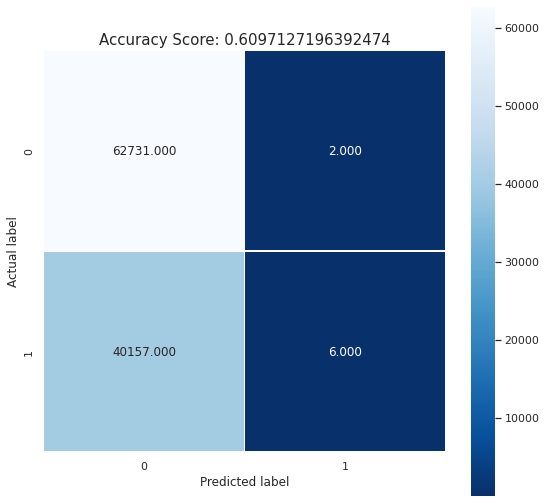

In [162]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

My model is predicting 60.9% accuracy but looking at the confusion matrix model did not predict lot predict lot of not getting cancelled as compare to getting cancelled, this is making baised model.
Model can be improved by focusing on precision and recall to elemenate the baising in the model